## Changing N and f 

Using the same external forcing as in CNTDIFF/run03, I modified the stratifiaction N in 3 runs (14,15,16) and f in 2 (18, 19).

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from math import *

%matplotlib inline

from netCDF4 import Dataset

import seaborn as sns

import canyon_tools.readout_tools as rdout

import canyon_tools.metrics_tools as mpt


In [2]:
# load grid variables
Grid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
GridOut = Dataset(Grid)
GridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
GridNoCOut = Dataset(GridNoC)
State03 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
State14 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/stateGlob.nc'
State15 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/stateGlob.nc'
State16 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/stateGlob.nc'
State18 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/stateGlob.nc'
State19 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/stateGlob.nc'

StateOut =   Dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc')

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rdout.getField(Grid, 'XC') # x coords tracer cells
yc = rdout.getField(Grid, 'YC') # y coords tracer cells
rc = GridOut.variables['RC']
z = StateOut.variables['Z']
times = StateOut.variables['T']

bathy = rdout.getField(Grid, 'Depth')

hFacC = rdout.getField(Grid, 'HFacC')
MaskC = rdout.getMask(Grid, 'HFacC')

rA = rdout.getField(GridNoC, 'rA') 
drF = GridNoCOut.variables['drF'] # vertical distance between faces
drC = GridNoCOut.variables['drC'] # vertical distance between centers
dxf = GridNoCOut.variables['dxF']

hFacCNoC = rdout.getField(GridNoC, 'HFacC')
mask_NoC = rdout.getMask(GridNoC, 'HFacC')


### Along shore velocity

In [3]:
# get u and v components of velocity
Ustag = rdout.getField(State03,'U')
Vstag = rdout.getField(State03,'V')
UU03, VV03 = rdout.unstagger(Ustag,Vstag)

In [4]:
Ustag = rdout.getField(State14,'U')
Vstag = rdout.getField(State14,'V')
UU14, VV14 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State15,'U')
Vstag = rdout.getField(State15,'V')
UU15, VV15 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State16,'U')
Vstag = rdout.getField(State16,'V')
UU16, VV16 = rdout.unstagger(Ustag,Vstag)

In [5]:
Ustag = rdout.getField(State18,'U')
Vstag = rdout.getField(State18,'V')
UU18, VV18 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State19,'U')
Vstag = rdout.getField(State19,'V')
UU19, VV19 = rdout.unstagger(Ustag,Vstag)


In [6]:
def plotU_timeseries(UU,times,kk,ii):
    '''
    '''
    sns.set_context('talk')
    sns.set_style('white')

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

    ax1.plot(times[:]/86400.0,UU[:,kk,10,ii], 'r', label = ('CS pos = %1.1f km' %(yc[10,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,180,ii], 'b', label = ('CS pos = %1.1f km' %(yc[180,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,227,ii], 'purple', label = ('CS pos = %1.1f km' %(yc[227,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,267,ii], 'orange', label = ('CS pos = %1.1f km' %(yc[267,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,350,ii], 'g', label = ('CS pos = %1.1f km' %(yc[350,ii]/1000.0)))

    ax1.legend(loc = 0)
    ax1.set_ylabel('Alongshore velocity (m/s)')
    ax1.set_xlabel('time (days)')
    ax1.set_title('at z = %1.1f m' %z[kk])

    cntr = ax2.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,750,900,1050], colors = '0.4')
    ax2.clabel(cntr)
    ax2.plot(xc[10,ii]/1000.0,yc[10,ii]/1000.0,'ro',markersize = 14)
    ax2.plot(xc[180,ii]/1000.0,yc[180,ii]/1000.0,'bo',markersize = 14)
    ax2.plot(xc[227,ii]/1000.0,yc[227,ii]/1000.0,'o',color = 'purple',markersize = 14)
    ax2.plot(xc[267,ii]/1000.0,yc[267,ii]/1000.0,'o',color='orange',markersize = 14)
    ax2.plot(xc[350,ii]/1000.0,yc[350,ii]/1000.0,'go',markersize = 14)
    ax2.set_xlabel('(km)')
    ax2.set_ylabel('(km)')

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


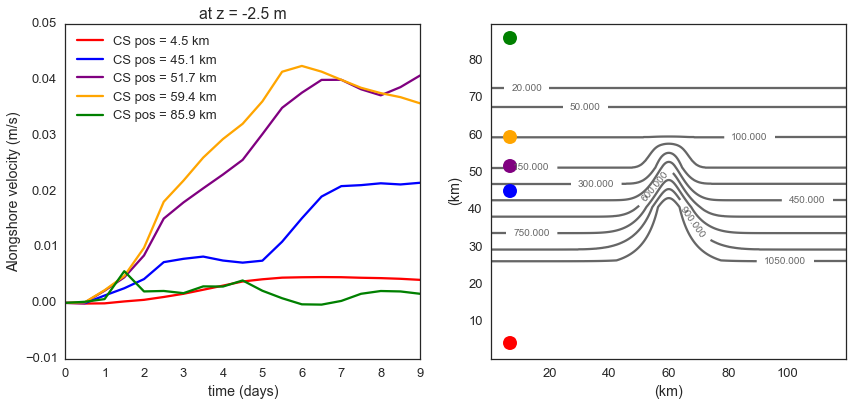

In [7]:
plotU_timeseries(UU03-UU14,times,0,10)


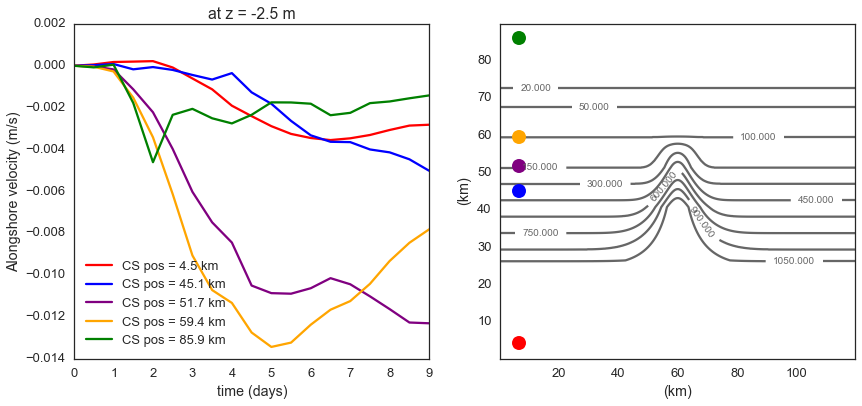

In [8]:
plotU_timeseries(UU03-UU15,times,0,10)


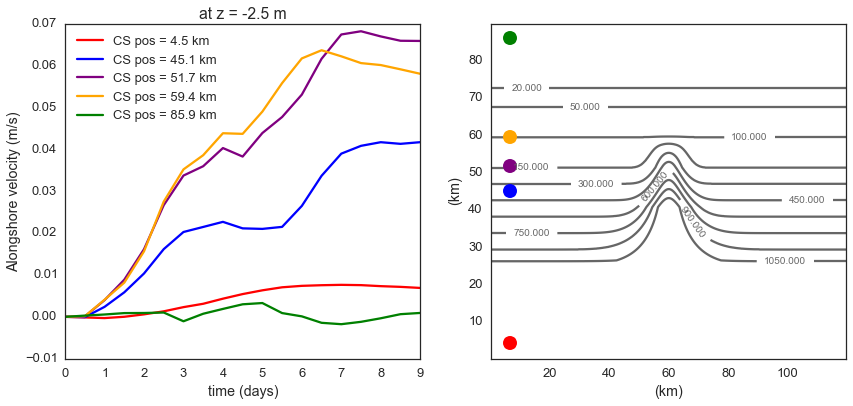

In [9]:
plotU_timeseries(UU03-UU16,times,0,10)


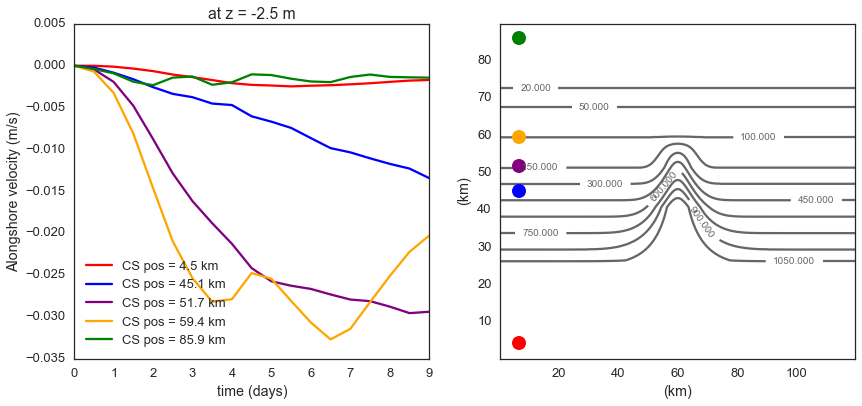

In [10]:
plotU_timeseries(UU03-UU18,times,0,10)

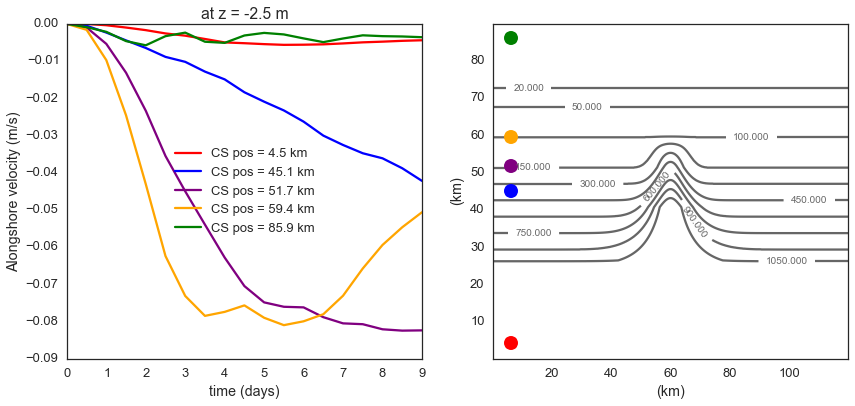

In [12]:
plotU_timeseries(UU03-UU19,times,0,10)

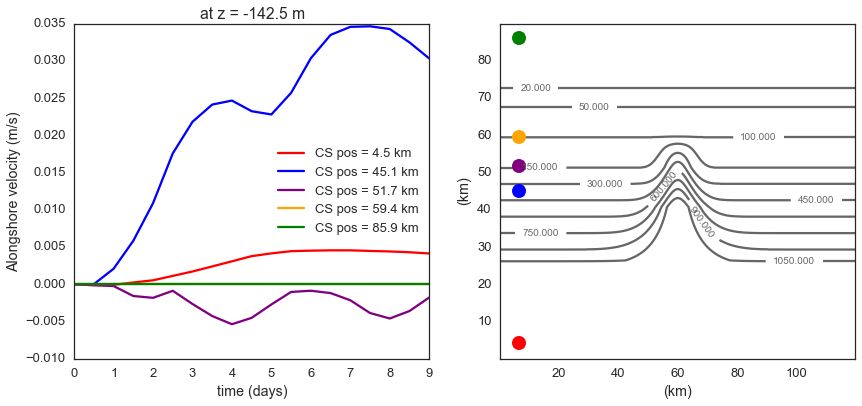

In [13]:
plotU_timeseries(UU03-UU14,times,28,10)

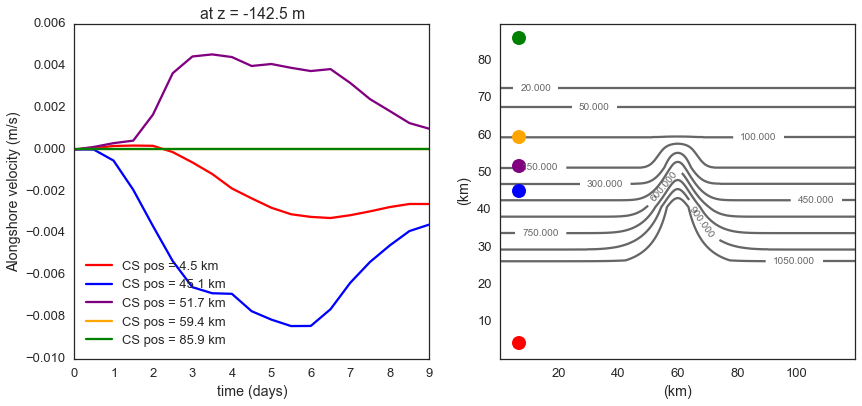

In [14]:
plotU_timeseries(UU03-UU15,times,28,10)

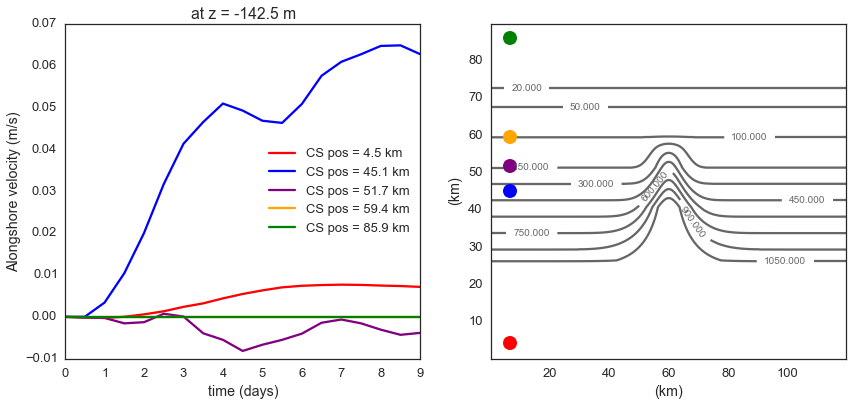

In [15]:
plotU_timeseries(UU03-UU16,times,28,10)

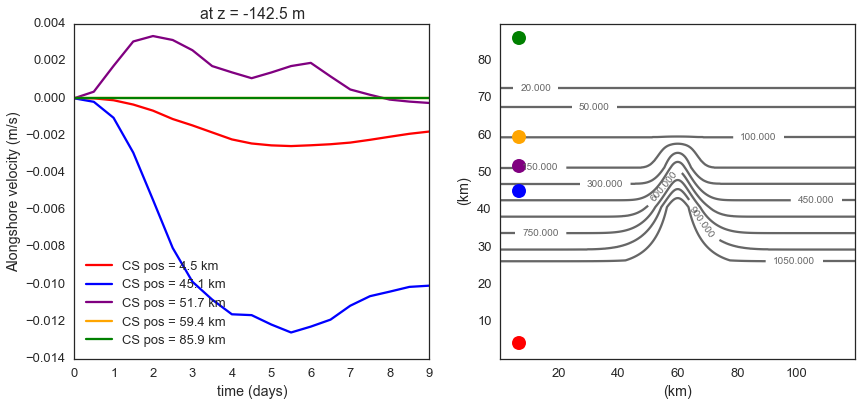

In [16]:
plotU_timeseries(UU03-UU18,times,28,10)

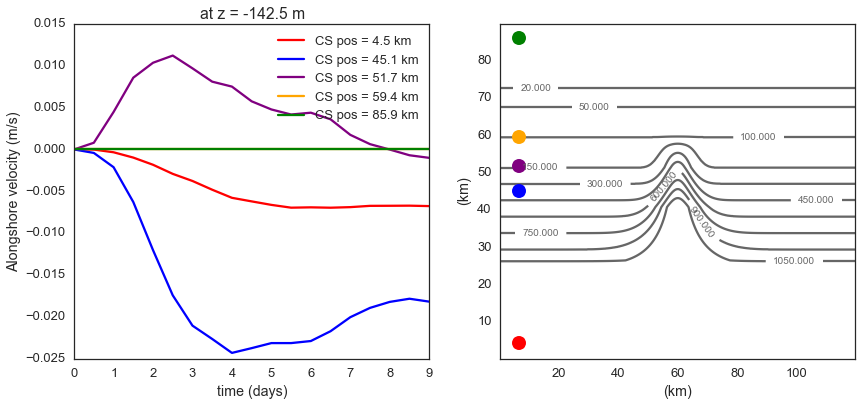

In [17]:
plotU_timeseries(UU03-UU19,times,28,10)

## Quick comparison of temperatures

In [18]:
Temp03 = rdout.getField(State03,'Temp')

In [19]:
Temp14 = rdout.getField(State14,'Temp')
Temp15 = rdout.getField(State15,'Temp')

In [21]:
Temp16 = rdout.getField(State16,'Temp')
Temp18 = rdout.getField(State18,'Temp')
Temp19 = rdout.getField(State19,'Temp')

In [22]:
MaskExp = np.expand_dims(MaskC,0)
MaskT = MaskExp + np.zeros(Temp03.shape)

In [23]:
Temp_masked03 = np.ma.masked_array(Temp03,mask = MaskT) 

In [24]:
Temp_masked14 = np.ma.masked_array(Temp14,mask = MaskT) 
Temp_masked15 = np.ma.masked_array(Temp15,mask = MaskT) 
Temp_masked16 = np.ma.masked_array(Temp16,mask = MaskT) 
Temp_masked18 = np.ma.masked_array(Temp18,mask = MaskT) 
Temp_masked19 = np.ma.masked_array(Temp19,mask = MaskT) 

In [25]:
def contourfTemp(Temp,tt1=2,tt2=4,tt3=6,tt4=8,tt5=10,tt6=12,tt7=14,tt8=16,tt9=18,tmax=17,tmin=0,colormap='rainbow'):
    '''
    '''
    sns.set_context('talk')
    sns.set_style('white')

    fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(15,10), sharex=True, sharey=True)

    cf = ax1.contourf(xc/1000.0,yc/1000.0,Temp[tt1,:,:], 20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax1.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax1.clabel(cntr)
    
    cf = ax2.contourf(xc/1000.0,yc/1000.0,Temp[tt2,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax2.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax2.clabel(cntr)
    
    cf = ax3.contourf(xc/1000.0,yc/1000.0,Temp[tt3,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax3.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax3.clabel(cntr)
    
    cf = ax4.contourf(xc/1000.0,yc/1000.0,Temp[tt4,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax4.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax4.clabel(cntr)
    
    cf = ax5.contourf(xc/1000.0,yc/1000.0,Temp[tt5,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax5.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax5.clabel(cntr)
    
    cf = ax6.contourf(xc/1000.0,yc/1000.0,Temp[tt6,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax6.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax6.clabel(cntr)
    
    cf = ax7.contourf(xc/1000.0,yc/1000.0,Temp[tt7,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax7.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax7.clabel(cntr)
    
    cf = ax8.contourf(xc/1000.0,yc/1000.0,Temp[tt8,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax8.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax8.clabel(cntr)
    
    cf9 = ax9.contourf(xc/1000.0,yc/1000.0,Temp[tt9,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax9.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax9.clabel(cntr)
    
    ax1.annotate('Day 1', xy=(1, 1), xytext=(100, 5), fontsize = 14)
    ax9.annotate('Day 9', xy=(1, 1), xytext=(100, 5), fontsize = 14)
    
    cbar_ax = fig.add_axes([0.12, -0.02, 0.8, 0.03])
    fig.colorbar(cf9, cax=cbar_ax, orientation='horizontal')
    cbar_ax.set_xlabel('Temperature ($^{\circ}C$)')
    
    ax4.set_ylabel('(km)')
    ax8.set_xlabel('(km)')
    plt.tight_layout()

## Surface

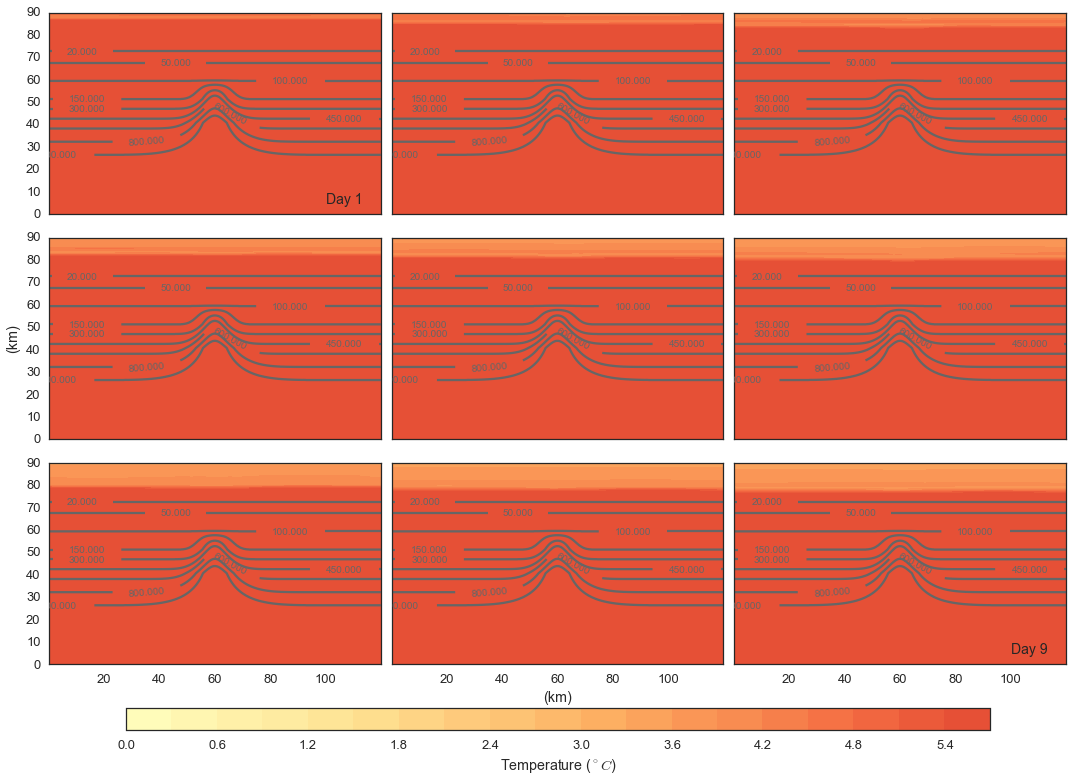

In [30]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked14[:,0,:,:],tmax=8.0,tmin=-8.0,colormap='RdYlBu_r')

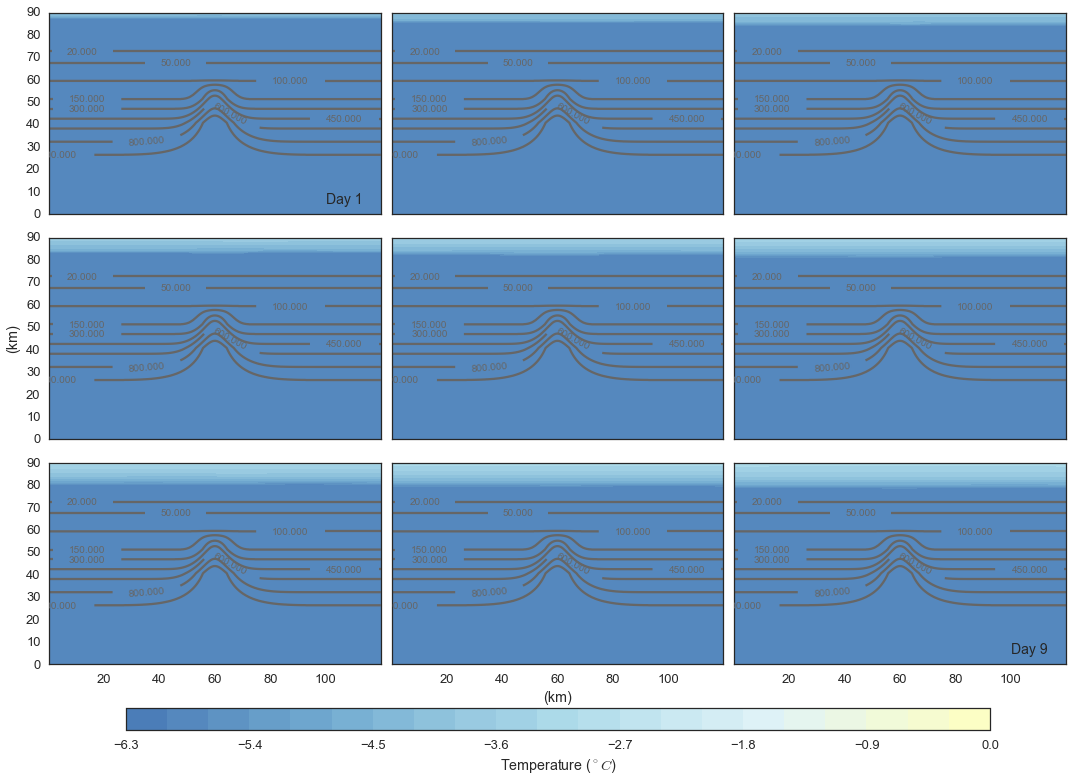

In [33]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked15[:,0,:,:],tmax=8.0,tmin=-8.0,colormap='RdYlBu_r')

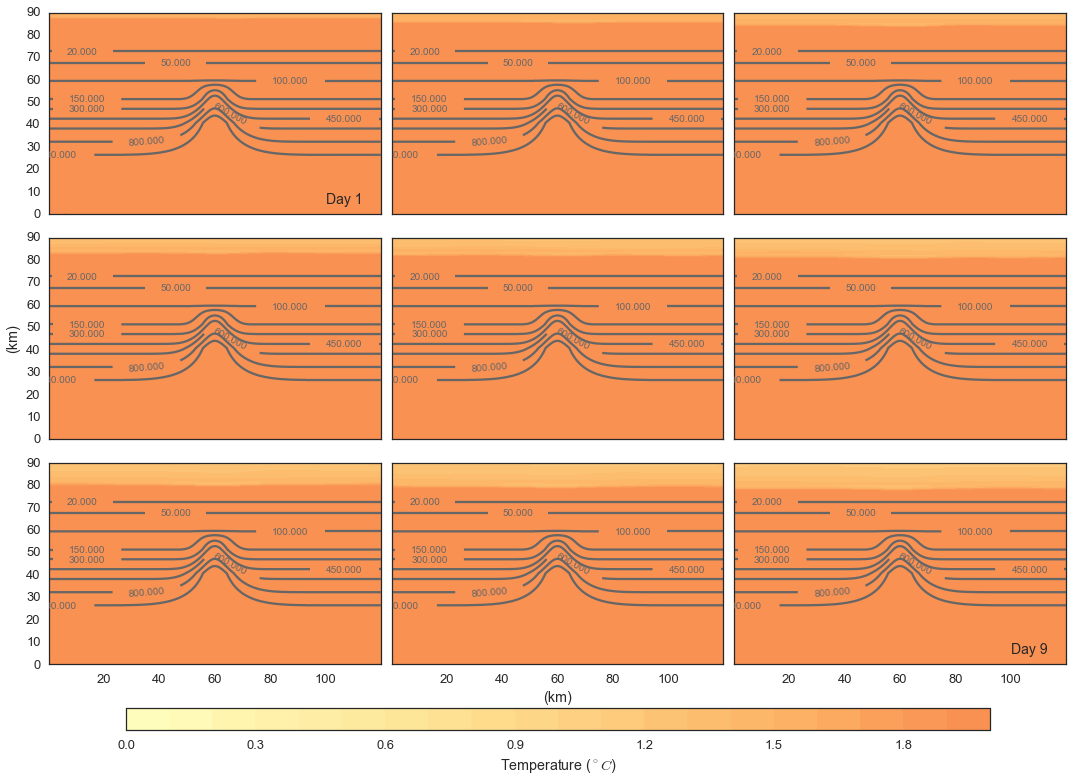

In [36]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked16[:,0,:,:],tmax=4.0,tmin=-4.0,colormap='RdYlBu_r')

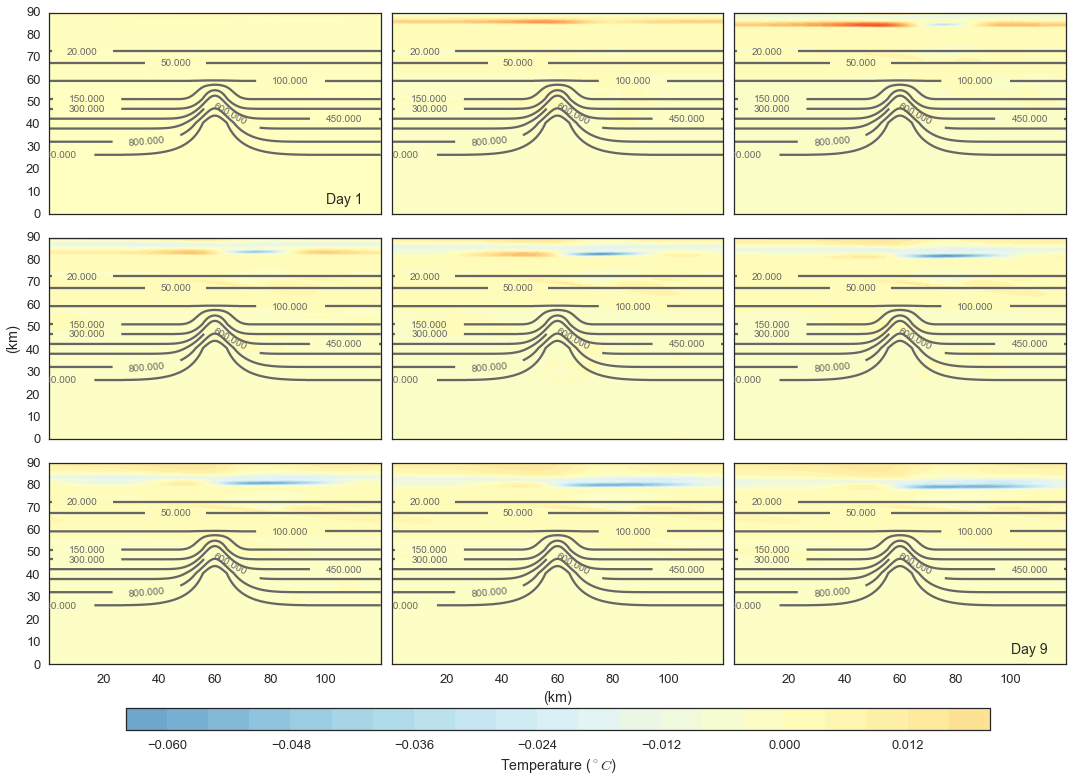

In [40]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked18[:,0,:,:],tmax=0.1,tmin=-0.1,colormap='RdYlBu_r')

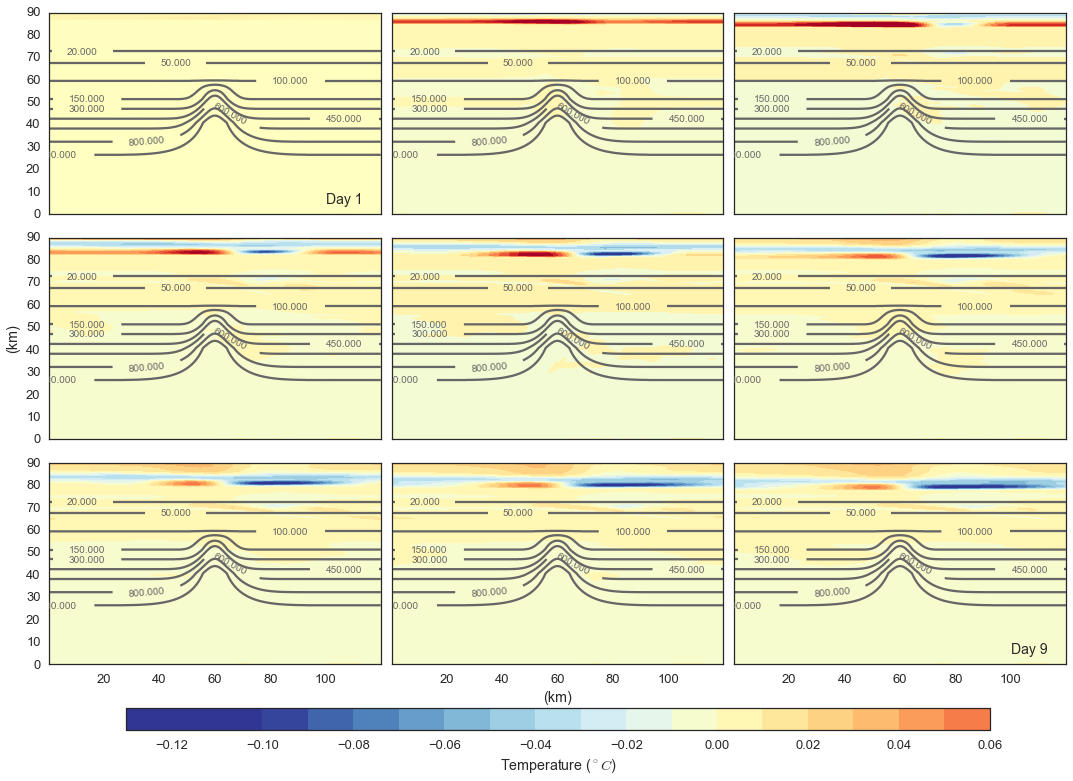

In [43]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked19[:,0,:,:],tmax=0.1,tmin=-0.1,colormap='RdYlBu_r')

## Shelf break depth

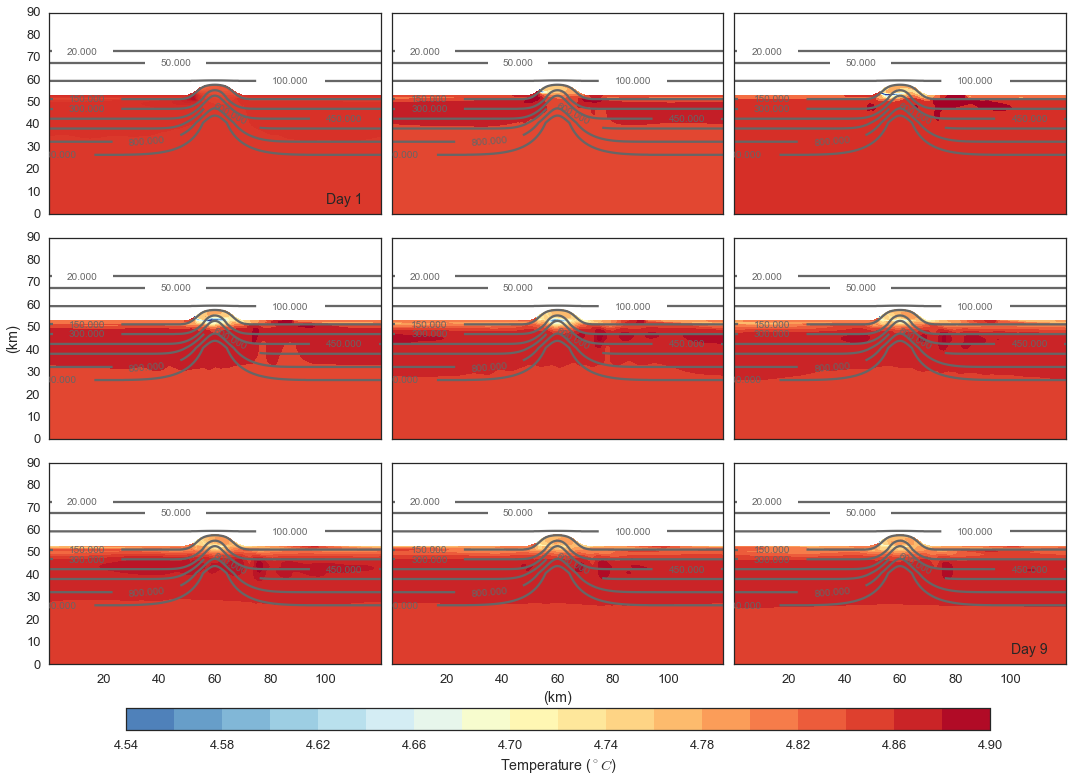

In [59]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked14[:,28,:,:],tmax=4.9,tmin=4.5,colormap='RdYlBu_r')

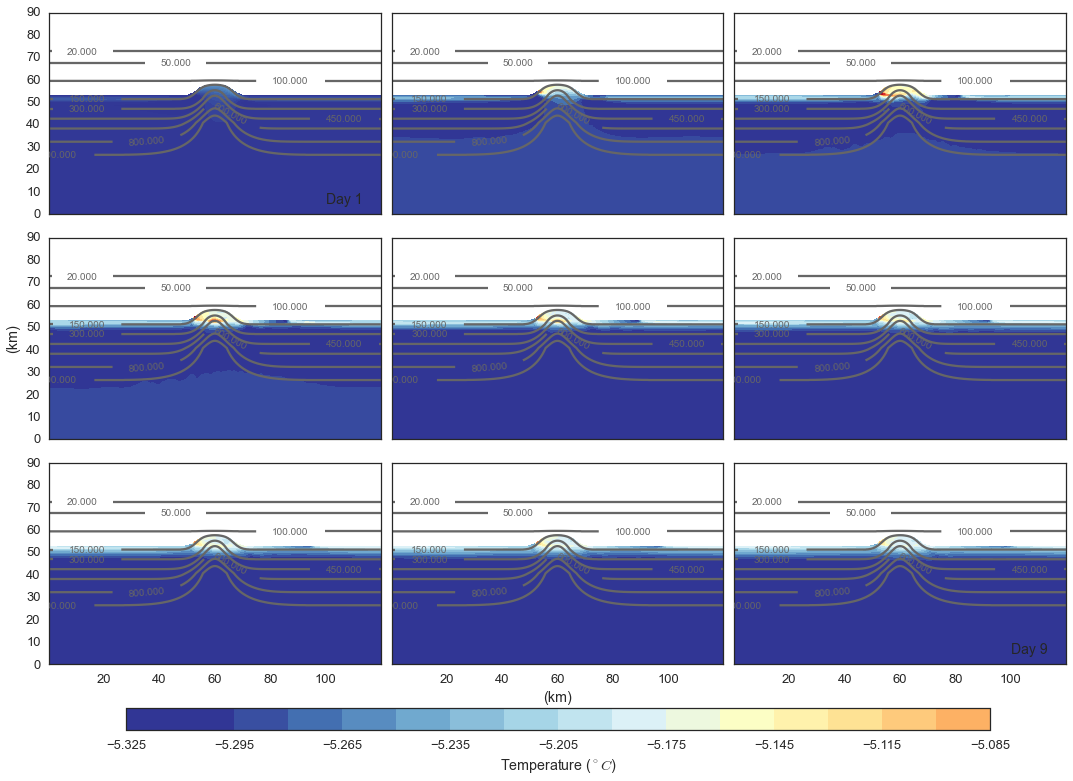

In [61]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked15[:,28,:,:],tmax=-5.0,tmin=-5.3,colormap='RdYlBu_r')

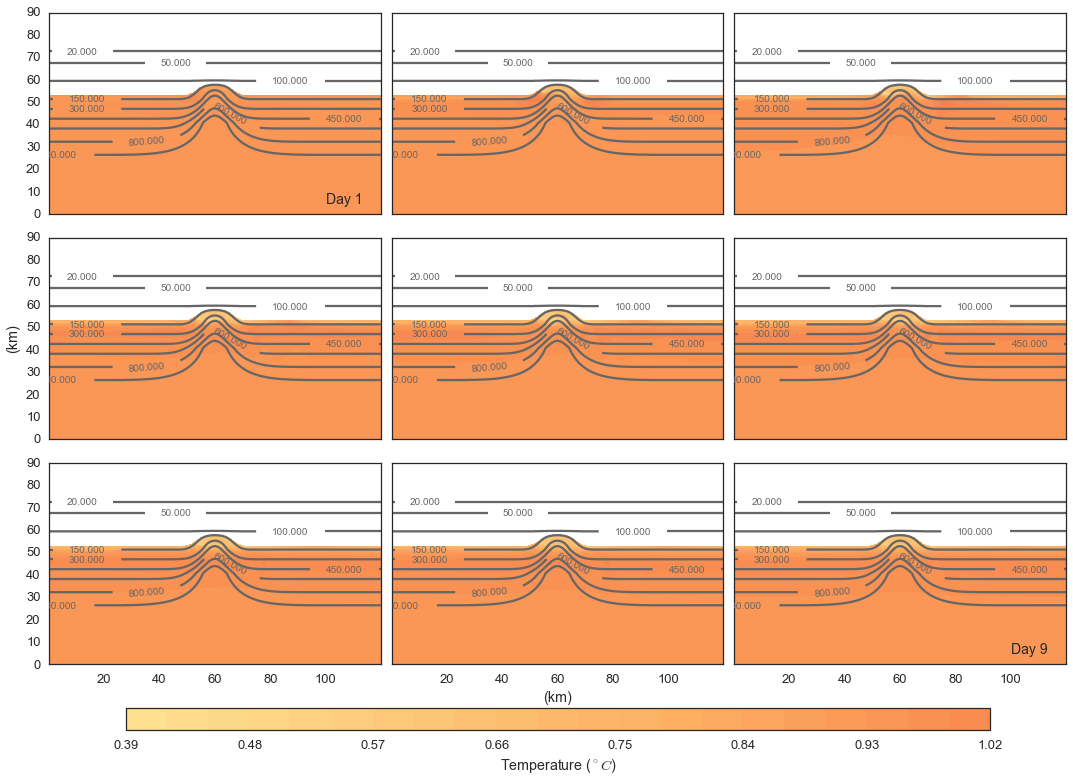

In [51]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked16[:,28,:,:],tmax=2,tmin=-2,colormap='RdYlBu_r')

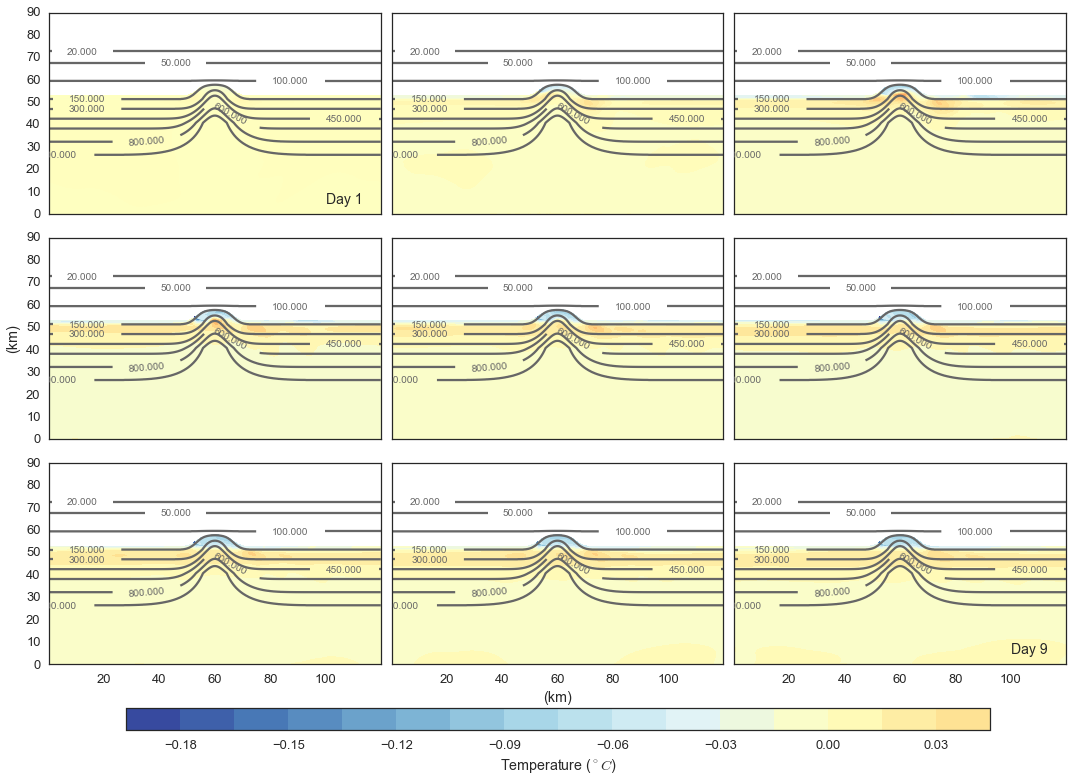

In [53]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked18[:,28,:,:],tmax=0.2,tmin=-0.2,colormap='RdYlBu_r')

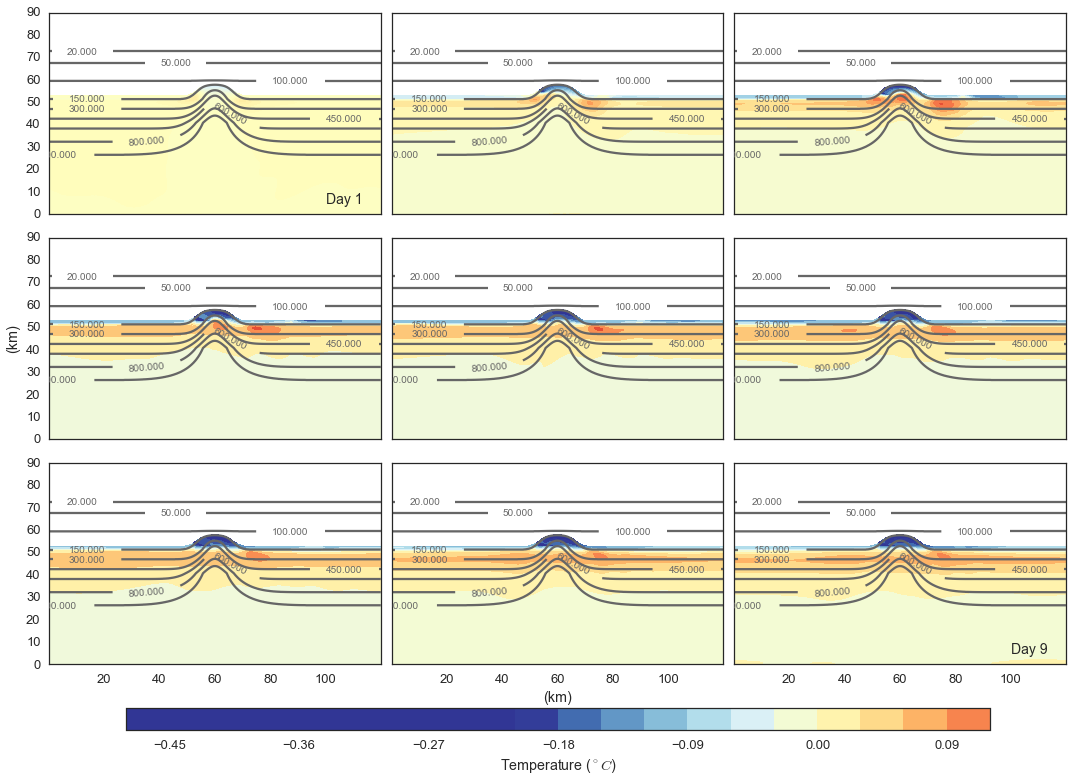

In [54]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked19[:,28,:,:],tmax=0.2,tmin=-0.2,colormap='RdYlBu_r')

## Upwelling differences - vertically integrated tracer along shelf

In [62]:
def HCW_Tracer_AlongShelf(Tr,MaskC,nzlim,rA,hFacC,drF,yin,zfin,xi,yi):
  '''
  INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general, this should be size 19x90x360x360
    MaskC : Land mask for tracer
    nzlim : The nz index under which to look for water properties
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    yin   : across-shore index of shelf break
    zfin  : shelf break index + 1 
    xi    : initial profile x index
    yi    : initial profile y index
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    VolWaterHighConc =  Array with the volume of water over the shelf [t,360] at every time output.
    Total_Tracer =  Array with the mass of tracer (m^3*[C]*l/m^3) at each x-position over the shelf [t,360] at 
                    every time output. 
                                                
  -----------------------------------------------------------------------------------------------------------------------
  '''
  maskExp = mpt.maskExpand(MaskC,Tr)

  TrMask=np.ma.array(Tr,mask=maskExp)   
    
  trlim = TrMask[0,nzlim,yi,xi]
    
  print('tracer limit concentration is: ',trlim)
    
    
  # mask cells with tracer concentration < trlim on shelf
  HighConc_Masked = np.ma.masked_less(TrMask[:,:zfin,yin:,:], trlim) 
  HighConc_Mask = HighConc_Masked.mask
    
  #Get volume of water of cells with relatively high concentration
  rA_exp = np.expand_dims(rA[yin:,:],0)
  drF_exp = np.expand_dims(np.expand_dims(drF[:zfin],1),1)
  rA_exp = rA_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
  drF_exp = drF_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
    
  ShelfVolume = hFacC[:zfin,yin:,:]*drF_exp*rA_exp
  ShelfVolume_exp = np.expand_dims(ShelfVolume,0)
  ShelfVolume_exp = ShelfVolume_exp + np.zeros(HighConc_Mask.shape)
    
  HighConc_CellVol = np.ma.masked_array(ShelfVolume_exp,mask = HighConc_Mask) 
  VolWaterHighConc =np.ma.sum(np.ma.sum(HighConc_CellVol,axis = 1),axis=1)
    
   #Get total mass of tracer on shelf
  Total_Tracer = np.ma.sum(np.ma.sum(ShelfVolume_exp*TrMask[:,:zfin,yin:,:]*1000.0,axis = 1),axis=1)
   # 1 m^3 = 1000 l
    
  return (VolWaterHighConc, Total_Tracer)

In [64]:
Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
Tr03 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/ptracersGlob.nc'
Tr14 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/ptracersGlob.nc'
Tr15 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/ptracersGlob.nc'
Tr16 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/ptracersGlob.nc'
Tr18 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/ptracersGlob.nc'
Tr19 = rdout.getField(Ptracers,'Tr1')


In [65]:
HCW03,TrMASS03 = HCW_Tracer_AlongShelf(Tr03,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW14,TrMASS14 = HCW_Tracer_AlongShelf(Tr14,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW15,TrMASS15 = HCW_Tracer_AlongShelf(Tr15,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW16,TrMASS16 = HCW_Tracer_AlongShelf(Tr16,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW18,TrMASS18 = HCW_Tracer_AlongShelf(Tr18,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW19,TrMASS19 = HCW_Tracer_AlongShelf(Tr19,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)


('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


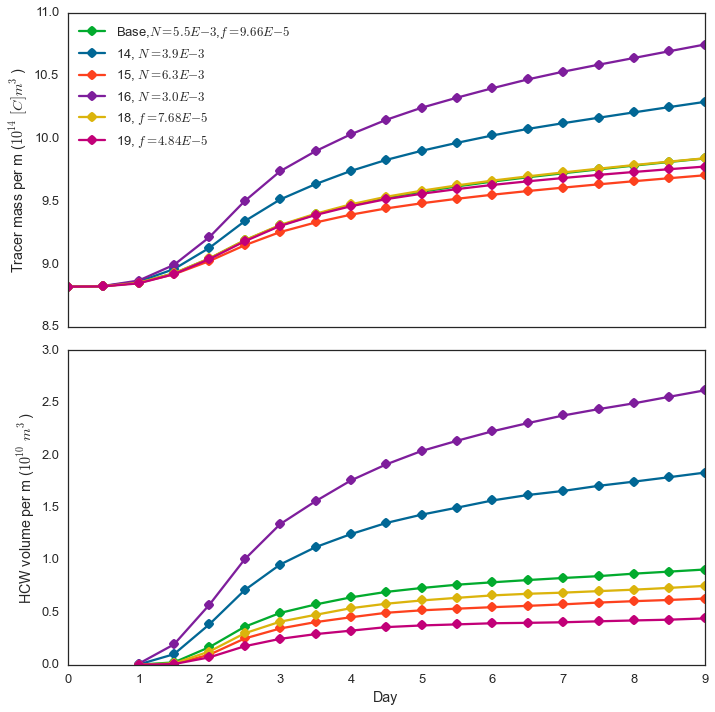

In [67]:
sns.set_context('talk')
sns.set_style('white')

fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMASS03,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],
         marker = 'o',label='Base,$N=5.5E-3$,$f=9.66E-5$')
ax1.plot(tt/2.,np.sum(TrMASS14,axis=1)/1.E14,sns.xkcd_rgb["peacock blue"],
         marker = 'o',label='14, $N=3.9E-3$')
ax1.plot(tt/2.,np.sum(TrMASS15,axis=1)/1.E14,sns.xkcd_rgb["orange red"],
         marker = 'o',label = '15, $N=6.3E-3$')
ax1.plot(tt/2.,np.sum(TrMASS16,axis=1)/1.E14,sns.xkcd_rgb["purple"],
         marker = 'o',label='16, $N=3.0E-3$')
ax1.plot(tt/2.,np.sum(TrMASS18,axis=1)/1.E14,sns.xkcd_rgb["gold"],
         marker = 'o',label='18, $f=7.68E-5$')
ax1.plot(tt/2.,np.sum(TrMASS19,axis=1)/1.E14,sns.xkcd_rgb["magenta"],
         marker = 'o',label='19, $f=4.84E-5 $')

ax2.plot(tt/2.,np.sum(HCW03,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base')
ax2.plot(tt/2.,np.sum(HCW14,axis=1)/1.E10,sns.xkcd_rgb["peacock blue"],marker = 'o',label='11')
ax2.plot(tt/2.,np.sum(HCW15,axis=1)/1.E10,sns.xkcd_rgb["orange red"],marker = 'o',label='12')
ax2.plot(tt/2.,np.sum(HCW16,axis=1)/1.E10,sns.xkcd_rgb["purple"],marker = 'o',label='17')
ax2.plot(tt/2.,np.sum(HCW18,axis=1)/1.E10,sns.xkcd_rgb["gold"],marker = 'o',label='3D04')
ax2.plot(tt/2.,np.sum(HCW19,axis=1)/1.E10,sns.xkcd_rgb["magenta"],marker = 'o',label='3D05')
 
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()

plt.show()